In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


EDA - Which parameter values correspond with higher or lower values of call volume?


In [5]:
df = pd.read_csv('~/Desktop/calls_weather_tfk.csv')


In [7]:
df['num_calls'].describe()

count    25465.000000
mean       136.328569
std         54.236394
min          3.000000
25%         88.000000
50%        128.000000
75%        184.000000
max        429.000000
Name: num_calls, dtype: float64

The quartiles are: 3-88 calls, 89-128 calls, 129-184 calls, and 184-429 calls.

In [8]:
calls = list(df['num_calls'])
quartiles = []
for c in calls:
    if c<=88:    quartiles.append(1)
    elif c<=128: quartiles.append(2)
    elif c<=184: quartiles.append(3)
    elif c<=429: quartiles.append(4)
df['quartile'] = quartiles

In [79]:
cols = ['num_calls', 'hour', 'TAVG_CALC', 'Incidences', 'day', 'month', 'PRCP', 'SNWD', 'SNOW']
df[df['quartile']==1][cols].describe()

,num_calls,hour,TAVG_CALC,Incidences,day,month,PRCP,SNWD,SNOW
count,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000
mean,73.295172,4.279836,56.067340,5.566657,15.877467,6.492104,0.144763,0.433556,0.088415
std,9.722077,1.551410,16.545269,4.129808,8.730941,3.417186,0.420715,2.135681,0.866570
min,3.000000,1.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,66.000000,3.000000,43.000000,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000
50%,74.000000,4.000000,57.000000,5.000000,16.000000,6.000000,0.000000,0.000000,0.000000
75%,81.000000,6.000000,70.000000,7.000000,23.000000,10.000000,0.050000,0.000000,0.000000
max,88.000000,11.000000,94.000000,34.000000,31.000000,12.000000,5.810000,23.000000,27.300000


In [80]:
df.groupby('quartile')[['num_calls']].describe()

num_calls                                                          
             count        mean        std    min    25%    50%    75%    max
quartile                                                                    
1           6586.0   73.295172   9.722077    3.0   66.0   74.0   81.0   88.0
2           6195.0  106.184019  11.551448   89.0   96.0  105.0  116.0  128.0
3           6318.0  157.022159  16.438751  129.0  143.0  157.0  172.0  184.0
4           6366.0  210.337575  19.326652  185.0  195.0  207.0  222.0  429.0

In [78]:
chk = df.groupby('quartile')[cols].mean()
chk.columns = ['hour', 'temperature', 'traffic incidents', 'day', 'month', 'precipitation', 'snow depth', 'snowfall']
print('Averages for each quartile of call volume:')
chk

Averages for each quartile of call volume:


,hour,temperature,traffic incidents,day,month,precipitation,snow depth,snowfall
quartile,,,,,,,,
1,4.279836,56.067340,5.566657,15.877467,6.492104,0.144763,0.433556,0.088415
2,4.732688,59.072881,4.718805,15.779500,6.614689,0.127019,0.356158,0.073801
3,9.344096,57.874802,6.286800,15.829218,6.252770,0.137167,0.365654,0.092308
4,12.408420,59.448790,10.153629,15.304430,5.989161,0.126588,0.453063,0.093230


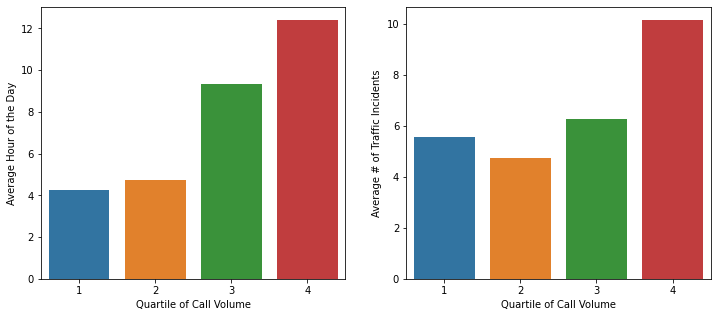

In [120]:
fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(121);
sns.barplot(x=df['quartile'], y=df['hour'], ci=None);
plt.xlabel('Quartile of Call Volume');
plt.ylabel('Average Hour of the Day');
ax = fig.add_subplot(122);
sns.barplot(x=df['quartile'], y=df['Incidences'], ci=None);
plt.xlabel('Quartile of Call Volume');
plt.ylabel('Average # of Traffic Incidents');


In [117]:
temps = list(df['TAVG_CALC'])
quartiles = []
for c in temps:
    if c<=45:     quartiles.append(1)
    elif c<=59.5: quartiles.append(2)
    elif c<=73:   quartiles.append(3)
    elif c<=94:   quartiles.append(4)
df['temperature quartile'] = quartiles

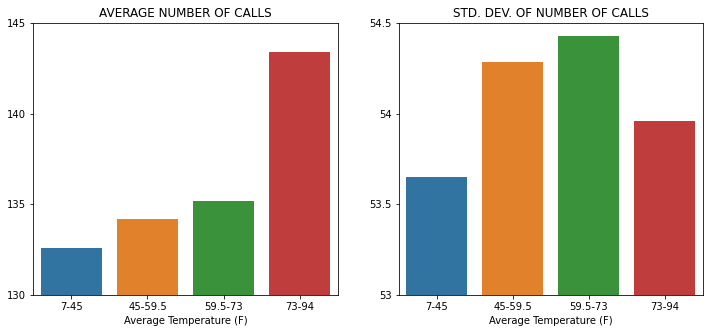

In [118]:
fig = plt.figure(figsize=(12,5));
ax = fig.add_subplot(121);
temp_quartile_calls = np.array(df.groupby('temperature quartile')['num_calls'].mean())-130
sns.barplot(x=['7-45', '45-59.5', '59.5-73', '73-94'], y=temp_quartile_calls, ci=None);
plt.xlabel('Average Temperature (F)');
plt.yticks([0, 5, 10, 15], labels=[130, 135, 140, 145]);
plt.title('AVERAGE NUMBER OF CALLS');

ax = fig.add_subplot(122);
temp_quartile_calls = np.array(df.groupby('temperature quartile')['num_calls'].std())-53
sns.barplot(x=['7-45', '45-59.5', '59.5-73', '73-94'], y=temp_quartile_calls, ci=None);
plt.xlabel('Average Temperature (F)');
plt.yticks([0, 0.5, 1, 1.5], labels=[53, 53.5, 54, 54.5]);
plt.title('STD. DEV. OF NUMBER OF CALLS');


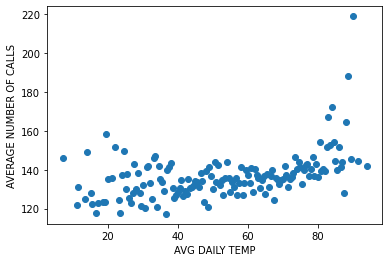

In [90]:
chk0 = df['TAVG_CALC'].unique()
chk0.sort()
chk1 = df.groupby('TAVG_CALC')['num_calls'].mean()
plt.scatter(chk0,chk1);
plt.xlabel('AVG DAILY TEMP');
plt.ylabel('AVERAGE NUMBER OF CALLS');
